In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from keras.models import load_model
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import  MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras.layers import Input, DepthwiseConv2D, Conv2D, Add, Flatten, Dense, GlobalAveragePooling2D, Activation, Softmax
from tensorflow.keras.models import Model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from multiprocessing import Pool
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from IPython.display import display, Image
from PIL import Image
from gtts import gTTS
from IPython.display import Audio



In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


# MNIST


In [ ]:
# Train data

data = pd.read_csv('/content/drive/MyDrive/Dissertation_data/Sign MNIST/sign_mnist_train.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
# Test data

test_data = pd.read_csv('/content/drive/MyDrive/Dissertation_data/Sign MNIST/sign_mnist_test.csv')
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [ ]:
# Training data

# Dividing into x and y

X = data.drop('label', axis=1)
X = X / 255.0
X = X.values.reshape(-1,28,28,1)
y = data['label']

# Converting numeric labels to one hot encoders for 24 classes (A-Z) excluding J and Z

y = to_categorical(y, num_classes = 26)



In [ ]:
# Test data

# Dividing into x and y

X_test = test_data.drop('label', axis=1)
X_test = X_test / 255.0
X_test = X_test.values.reshape(-1,28,28,1)
y_test = test_data['label']

# Converting numeric labels to one hot encoders for 24 classes (A-Z) excluding J and Z

y_test = to_categorical(y_test, num_classes = 26)



In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

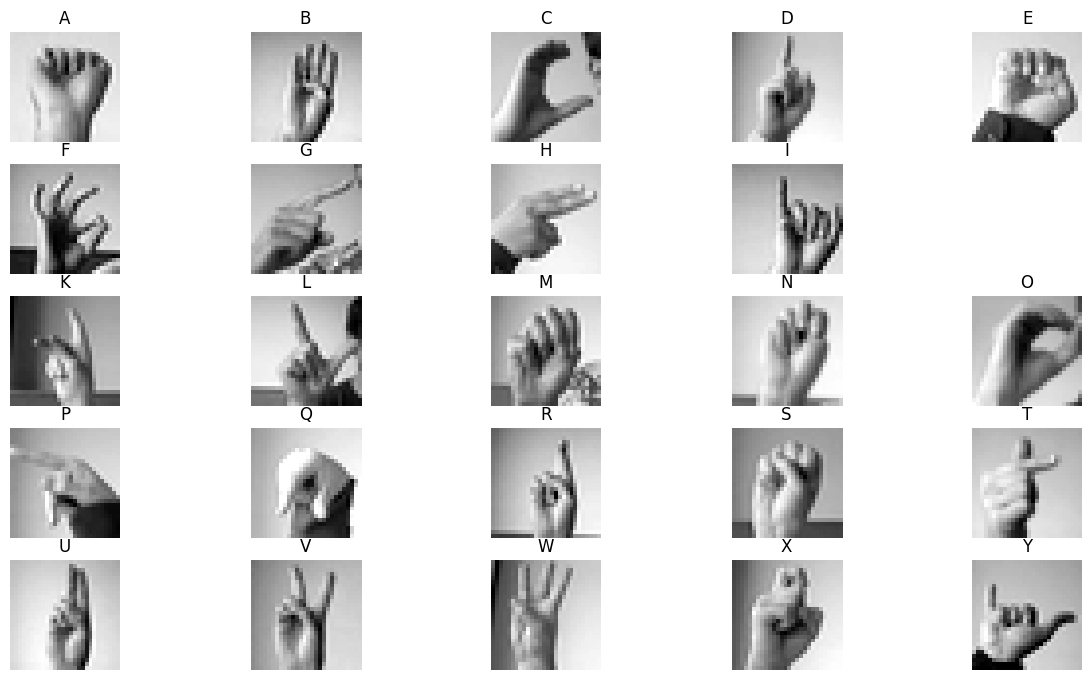

In [ ]:
# Displaying images for each Alphabet

plt.figure(figsize=(15, 10))

for i in range(26):

    # Getting a subset of the images that belong to the current letter (i)

    subset = X[y[:, i] == 1]

    # Checking if there are any images corresponding to this letter in the dataset

    if subset.shape[0] > 0:
        letter_img = subset[0]

        # 6 rows and 5 columns, so using i+1 to move through it

        plt.subplot(6, 5, i+1)
        plt.imshow(letter_img, cmap='gray')

        # 65 is the ascii value of 'A'

        plt.title(chr(i + 65))

        plt.axis('off')

plt.show()


In [ ]:
print(data.shape)

(27455, 785)


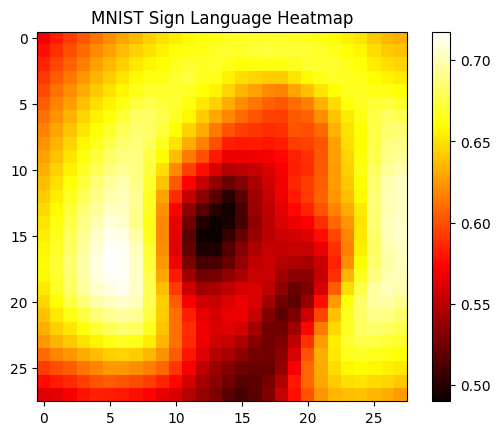

In [ ]:
def generate_heatmap(data, title):

    # Averaging over all images

    average_image = np.mean(data, axis=0)

    # Displaying the heatmap

    plt.imshow(average_image, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()
mnist_data = X.reshape(-1, 28, 28)

generate_heatmap(mnist_data, "MNIST Sign Language Heatmap")


In [ ]:
print(data['label'].value_counts())

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64


In [ ]:
def number_to_alphabet(n):
    return chr(65 + n)

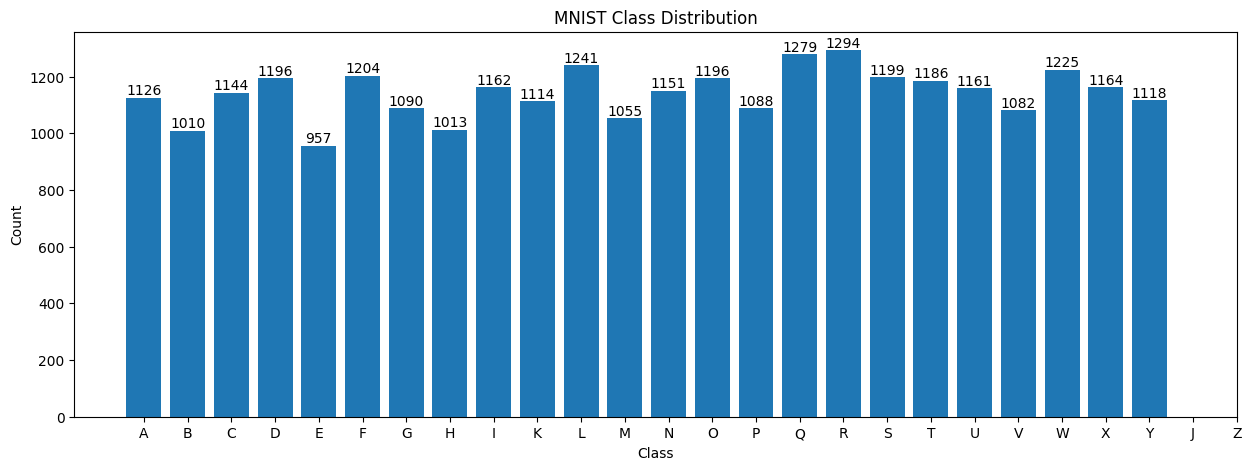

In [ ]:
# Finding out unique labels and their counts

unique_labels, counts = np.unique(y.argmax(axis=1), return_counts=True)

# Converting unique_labels to alphabets

unique_alphabets = [number_to_alphabet(label) for label in unique_labels]

plt.figure(figsize=(15, 5))
bars = plt.bar(unique_alphabets, counts)
plt.title("MNIST Class Distribution")
plt.xlabel('Class')
plt.ylabel('Count')

# Displaying A-Z on the x-axis

plt.xticks([chr(i) for i in range(65, 91)])

# Displaying the count on bars

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center')

plt.show()


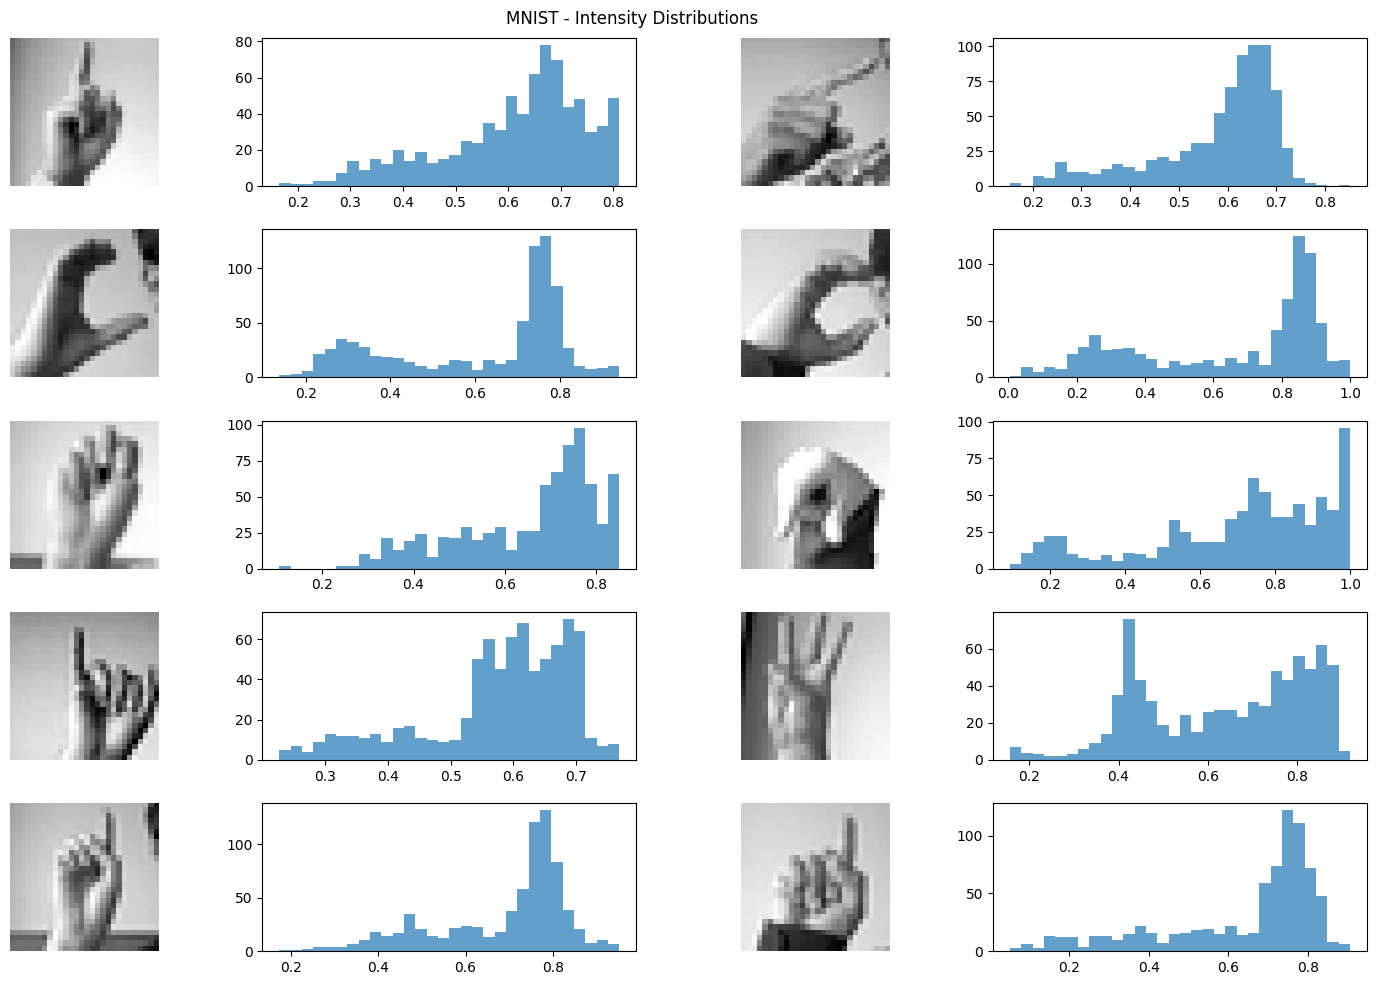

In [ ]:
# Checking the pixel intensity distributions for MNIST by plotting image and distribution side by side

def plot_intensity_and_image_MNIST(images):
    plt.figure(figsize=(15, 10))
    for i in range(10):
        plt.subplot(5, 4, 2*i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.subplot(5, 4, 2*i+2)
        plt.hist(images[i].ravel(), bins=30, alpha=0.7)
    plt.suptitle("MNIST - Intensity Distributions")
    plt.tight_layout()
    plt.show()

plot_intensity_and_image_MNIST(X)


# ASL FINGER

In [ ]:
asl_dir = '/content/drive/MyDrive/Dissertation_data/ASL Finger spelling'


In [ ]:
# Using an ImageDataGenerator object because there is a lot of data so can't load all of it at once

datagen = ImageDataGenerator(rescale=1./255)

# Loading images from the google drive directory

asl_generator = datagen.flow_from_directory(
    asl_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32)

Found 133631 images belonging to 5 classes.


In [ ]:
print(sorted(os.listdir(asl_dir))[:10])

['A', 'B', 'C', 'D', 'E']


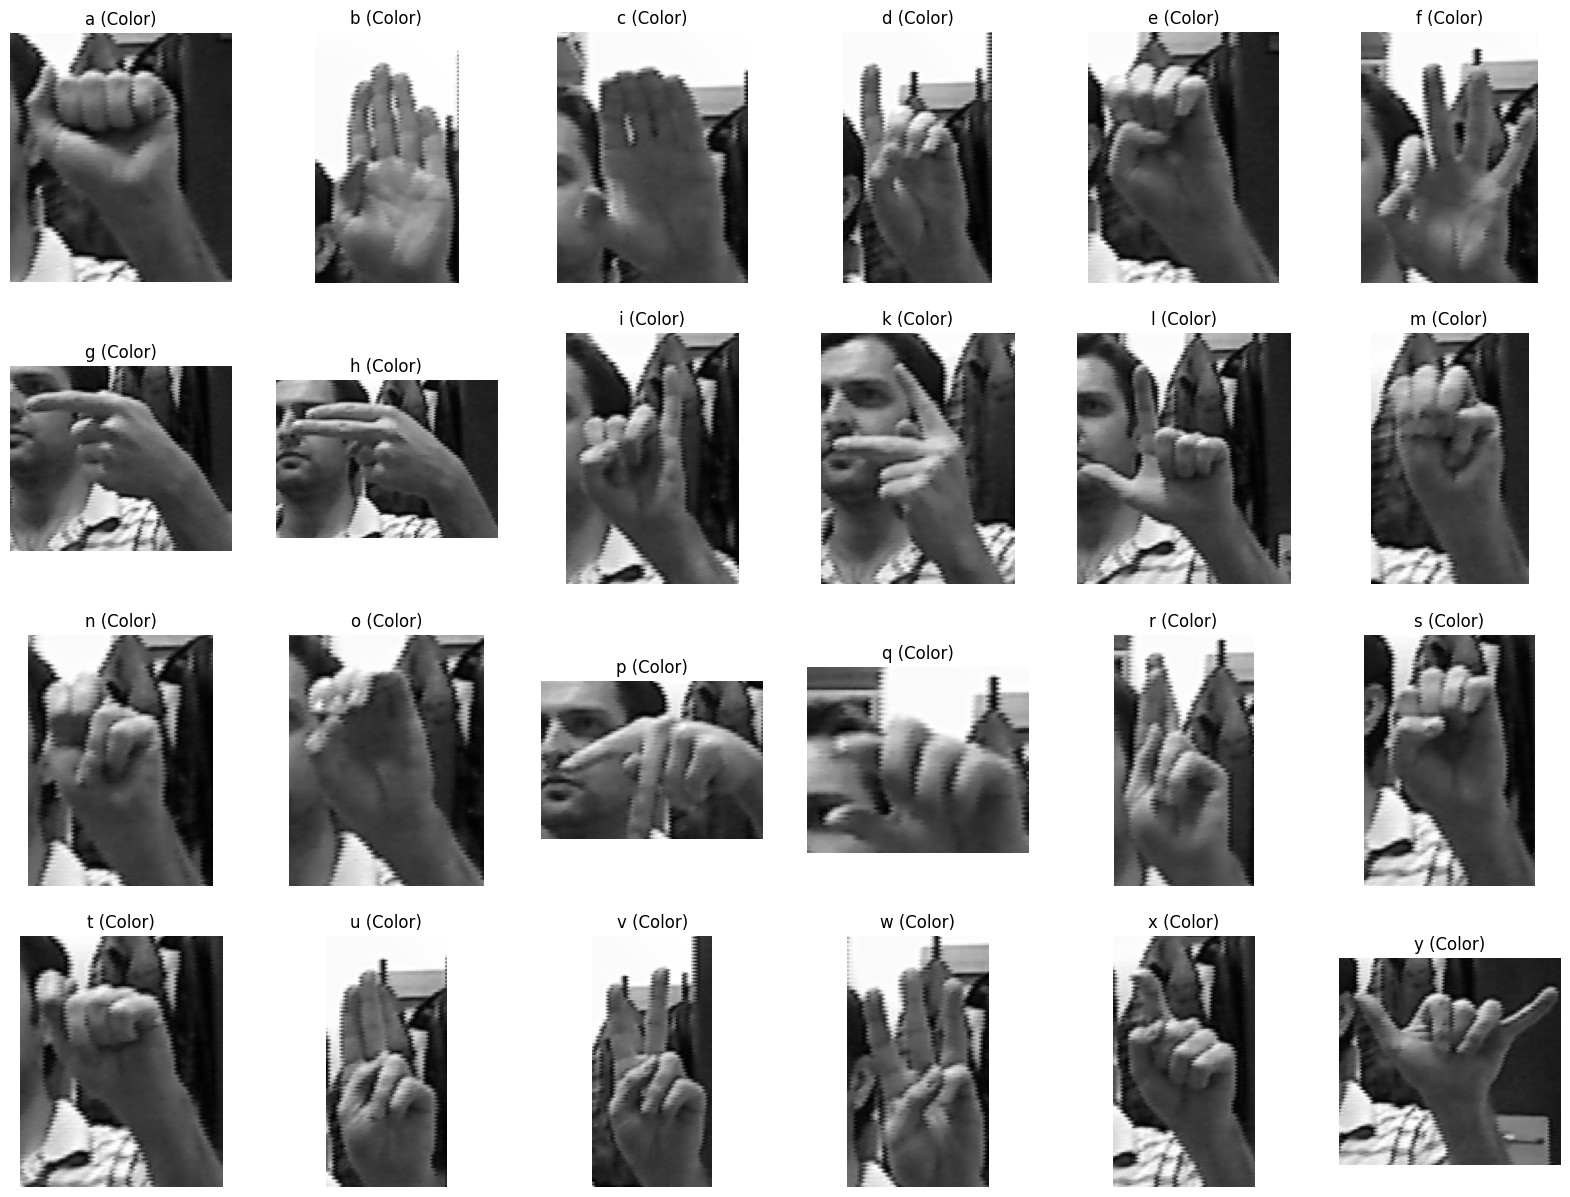

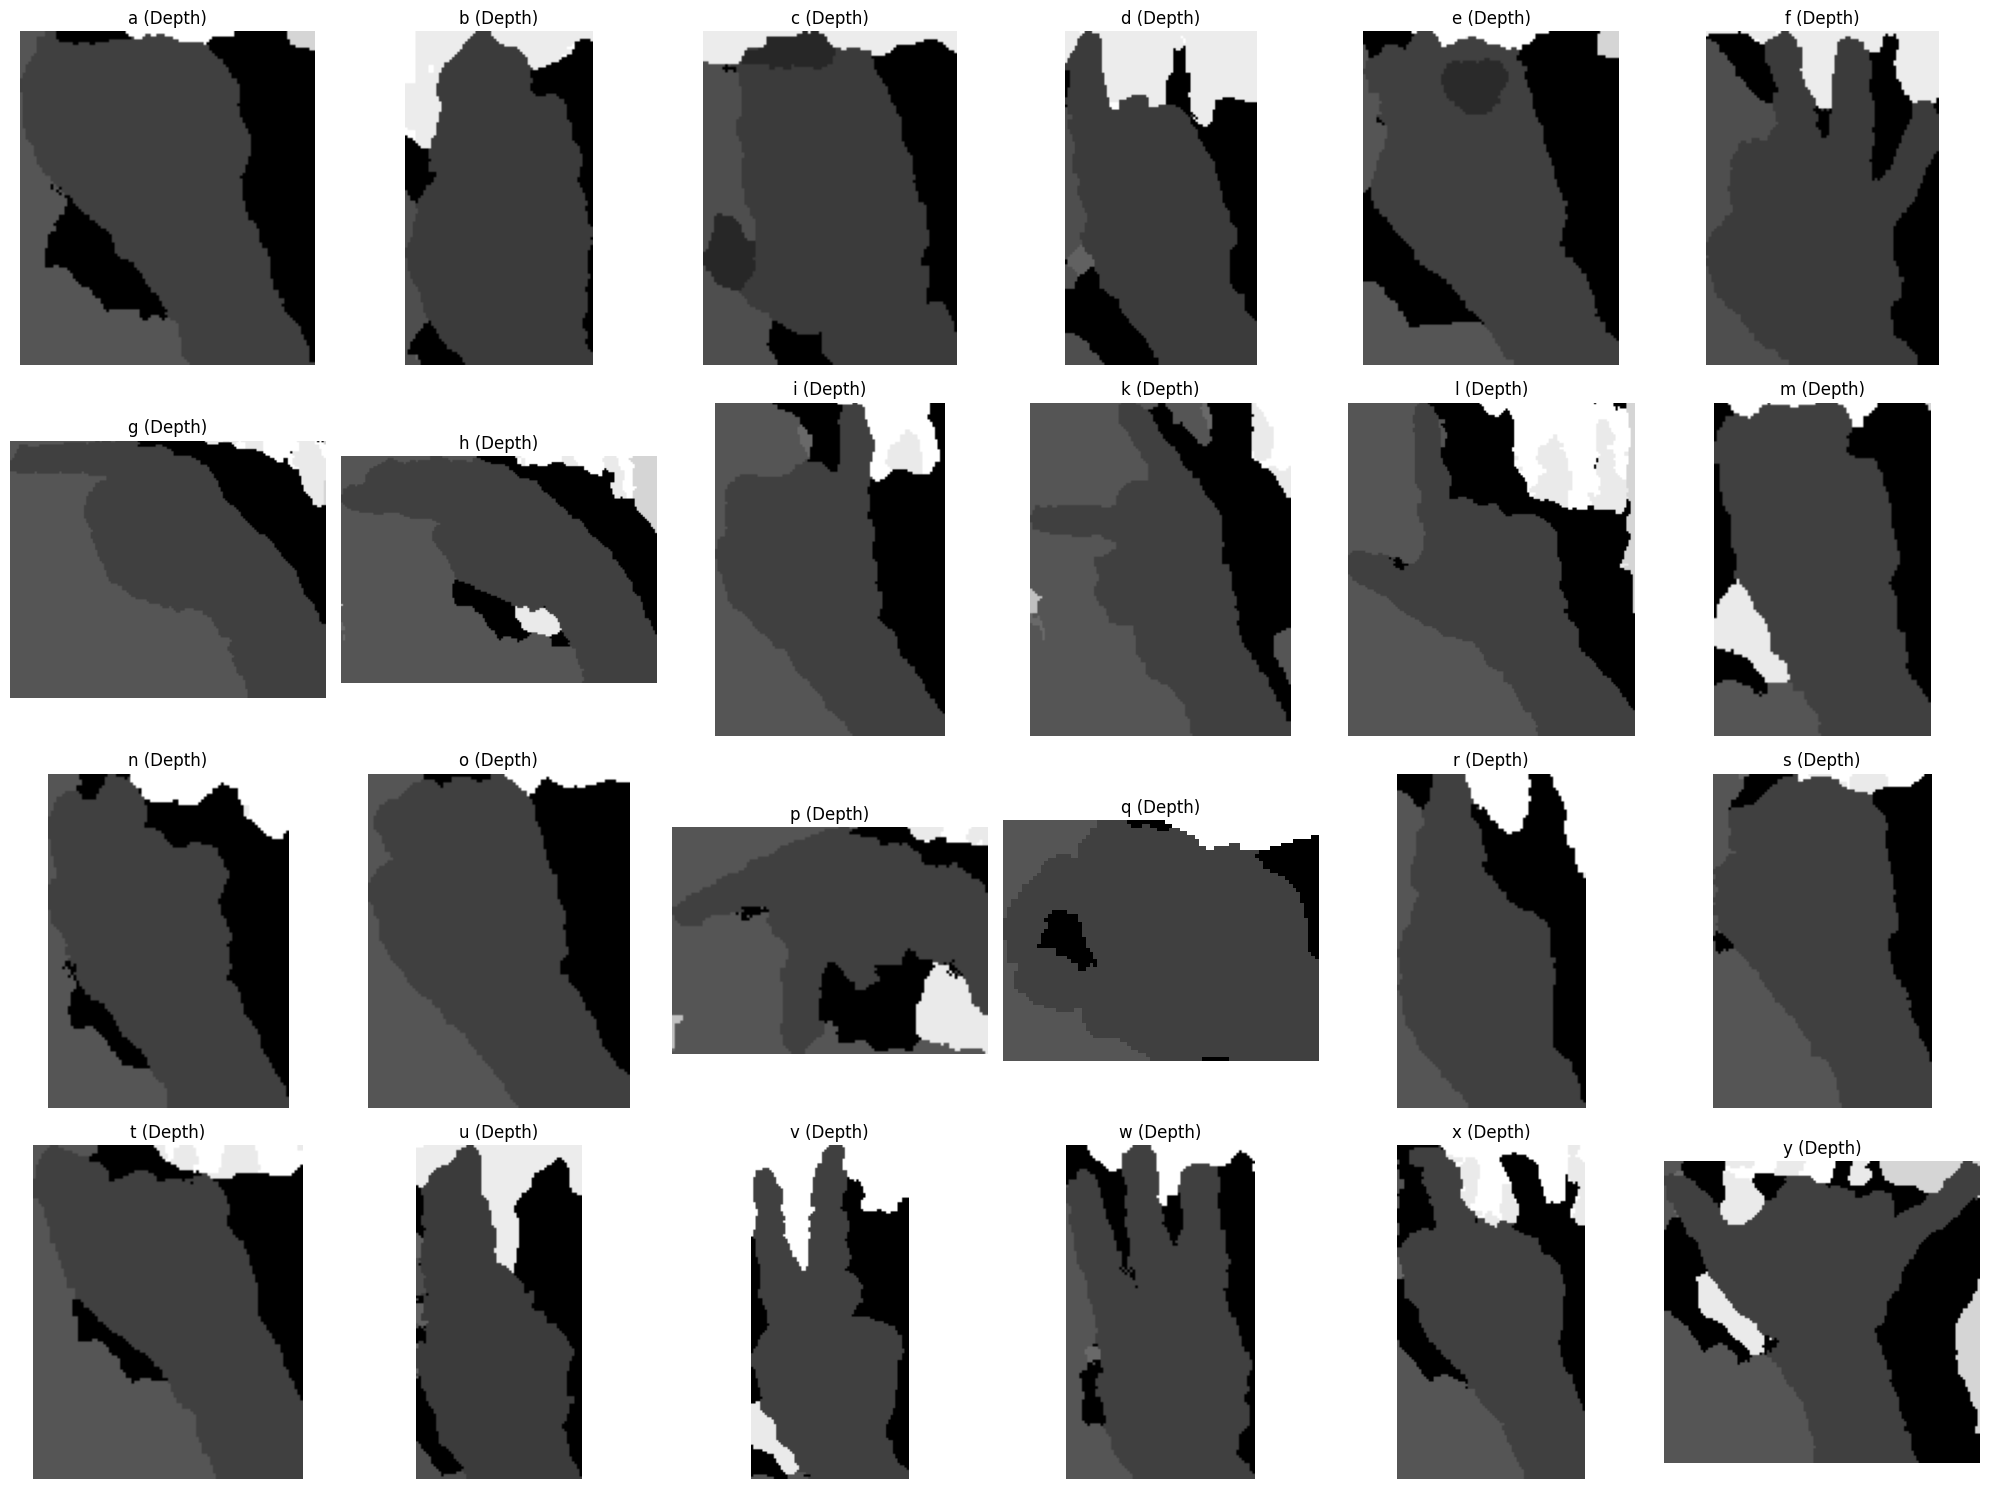

In [ ]:
# Plotting color and depth images for each letter

fig1, axs1 = plt.subplots(4, 6, figsize=(20, 15))
fig2, axs2 = plt.subplots(4, 6, figsize=(20, 15))

# Displaying images for only one user

first_user_dir = os.path.join(asl_dir, sorted(os.listdir(asl_dir))[0])

# Iterating over the alphabet folders within the first user's directory

for i, alphabet in enumerate(sorted(os.listdir(first_user_dir))):
    if i < 26:
        alphabet_folder = os.path.join(first_user_dir, alphabet)

        # Flags to track if a color and depth image for the current alphabet is

        color_img_found = False
        depth_img_found = False

        for filename in sorted(os.listdir(alphabet_folder)):

            # Checking if an image is color if it has either .jpg or .png extension and doesn't have the word 'depth' in its name

            if not color_img_found and (filename.endswith(".jpg") or filename.endswith(".png")) and 'depth' not in filename.lower():
                img_path = os.path.join(alphabet_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                axs1[i // 6, i % 6].imshow(img, cmap='gray')
                axs1[i // 6, i % 6].set_title(alphabet + " (Color)")
                axs1[i // 6, i % 6].axis('off')

                # Setting the flag to True indicating that a color image for this alphabet is found

                color_img_found = True

            # Depth images

            if not depth_img_found and 'depth' in filename.lower() and (filename.endswith(".jpg") or filename.endswith(".png")):
                img_path = os.path.join(alphabet_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                axs2[i // 6, i % 6].imshow(img, cmap='gray')
                axs2[i // 6, i % 6].set_title(alphabet + " (Depth)")
                axs2[i // 6, i % 6].axis('off')

                # Setting the flag to True indicating that a depth image for this alphabet is found

                depth_img_found = True

            if color_img_found and depth_img_found:
                break

plt.tight_layout()
plt.show()


In [ ]:
# Copying the asl data to the local Colab environment for faster execution

!cp -r "/content/drive/MyDrive/Dissertation_data/ASL Finger spelling" "/content/asl_local"

In [ ]:
asl_dir_local = "/content/asl_local"

# Creating a list of all depth image paths and their corresponding

data1 = []

for user_folder in os.listdir(asl_dir_local):
    user_path = os.path.join(asl_dir_local, user_folder)
    if os.path.isdir(user_path):
        for alphabet_folder in os.listdir(user_path):
            alphabet_path = os.path.join(user_path, alphabet_folder)
            for filename in os.listdir(alphabet_path):

                # Checking if filename starts with depth

                if filename.startswith("depth"):
                    data1.append([os.path.join(alphabet_path, filename), alphabet_folder])

# Converting the list to a dataframe so it's easier to access

df1 = pd.DataFrame(data1, columns=['filepath', 'label'])
df1


# Same process for color images

data = []

for user_folder in os.listdir(asl_dir_local):
    user_path = os.path.join(asl_dir_local, user_folder)
    if os.path.isdir(user_path):
        for alphabet_folder in os.listdir(user_path):
            alphabet_path = os.path.join(user_path, alphabet_folder)
            for filename in os.listdir(alphabet_path):

                # Checking if filename starts with color

                if filename.startswith("color"):
                    data.append([os.path.join(alphabet_path, filename), alphabet_folder])


df = pd.DataFrame(data, columns=['filepath', 'label'])
df

,filepath,label
0,/content/asl_local/A/i/color_8_0166.png,i
1,/content/asl_local/A/i/color_8_0313.png,i
2,/content/asl_local/A/i/color_8_0052.png,i
3,/content/asl_local/A/i/color_8_0209.png,i
4,/content/asl_local/A/i/color_8_0491.png,i
...,...,...
66777,/content/asl_local/E/r/color_17_0034.png,r
66778,/content/asl_local/E/r/color_17_0083.png,r
66779,/content/asl_local/E/r/color_17_0499.png,r
66780,/content/asl_local/E/r/color_17_0442.png,r


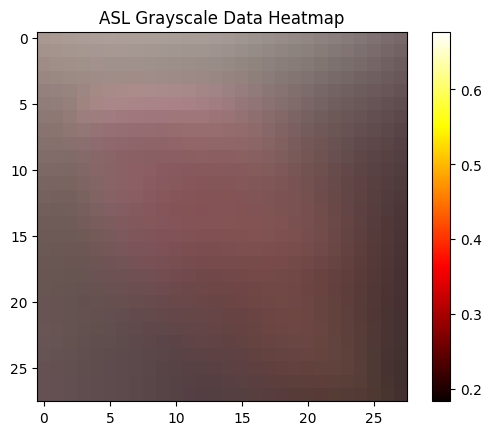

In [ ]:
common_size = (28, 28)

# Reading and resizing images

images = [resize(imread(path), common_size) for path in df['filepath']]
all_images = np.stack(images, axis=0)

# Generating heatmap for ASL grayscale images

def generate_heatmap(data, title):
    average_image = np.mean(data, axis=0)
    plt.imshow(average_image, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

generate_heatmap(all_images, "ASL Grayscale Data Heatmap")




In [ ]:
# Initializing the ImageDataGenerator object and keeping 20% data for validation

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
classes = list('abcdefghijklmnopqrstuvwxyz')

# For training data

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filepath",
    y_col="label",
    subset="training",
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    classes=classes,
    batch_size=64
)

# For validation

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col="filepath",
    y_col="label",
    subset="validation",
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    classes=classes,
    batch_size=64
)
# Before the preprocessing function it was giving 3 dimension which meant images were still rgb

X_batch, y_batch = next(train_generator)
print("Shape of X_batch:", X_batch.shape)
print("Shape of y_batch:", y_batch.shape)
print("\nFirst 5 labels in y_batch:")
print(y_batch[:5])


Found 53426 validated image filenames belonging to 26 classes.
Found 13356 validated image filenames belonging to 26 classes.
Shape of X_batch: (64, 28, 28, 1)
Shape of y_batch: (64, 26)

First 5 labels in y_batch:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]]


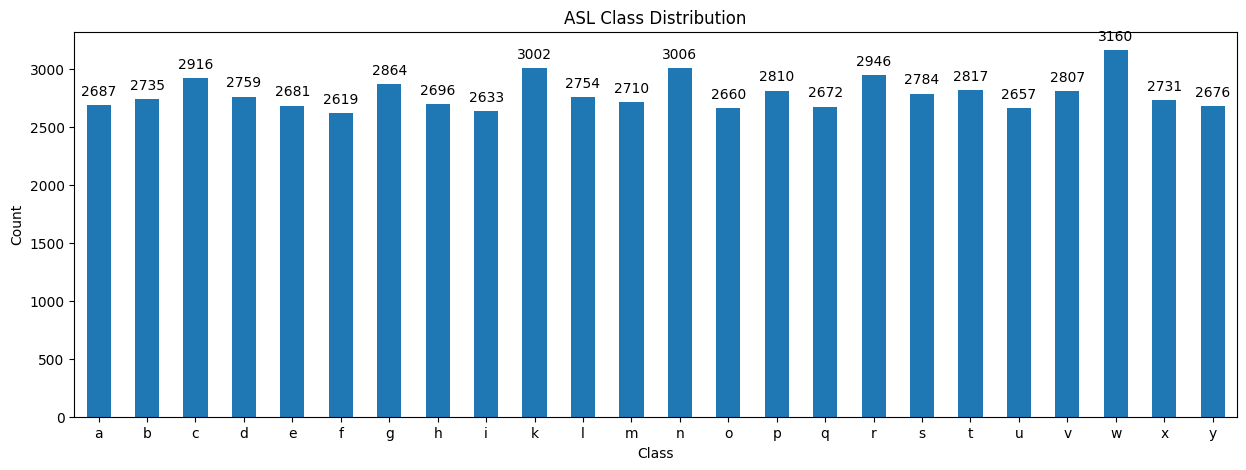

In [ ]:
# Checking the distribution of classes using the ASL dataframe

plt.figure(figsize=(15, 5))
ax = df['label'].value_counts().sort_index().plot(kind='bar')
plt.title("ASL Class Distribution")
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Displaying the count on bars

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center',va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



# Hand Detection in MNIST and ASL

# 1st attempt

In [ ]:
# Making bounding boxes for asl

def get_bounding_box(img):

    # rescaling the image back to the range [0, 255]

    img_uint8 = (img * 255).astype(np.uint8)
    ret, thresh = cv2.threshold(img_uint8, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None
    else:
        c = max(contours, key=cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        return (x, y, w, h)

# For ASL

X_asl_batch, _ = next(train_generator)

bounding_boxes_asl = [get_bounding_box(img.squeeze()) for img in X_asl_batch]

print(bounding_boxes_asl[:5])


In [ ]:
def visualize_bounding_boxes_for_asl(generator, num_samples=5):
    X_batch, _ = next(generator)

    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        bbox = get_bounding_box(X_batch[i].squeeze())
        if bbox:
            x, y, w, h = bbox
            plt.subplot(1, num_samples, i+1)
            plt.imshow(X_batch[i].squeeze(), cmap='gray')
            plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))
    plt.show()

# Visualizing bounding boxes for a few samples

visualize_bounding_boxes_for_asl(train_generator)


# Model training

In [ ]:
# Spatial attention block

def spatial_attention(input_feature):
    kernel_size = 7
    avg_pool = tf.keras.layers.GlobalAveragePooling2D()(input_feature)
    max_pool = tf.keras.layers.GlobalMaxPooling2D()(input_feature)

    avg_pool = tf.keras.layers.Reshape((1, 1, input_feature.shape[-1]))(avg_pool)
    max_pool = tf.keras.layers.Reshape((1, 1, input_feature.shape[-1]))(max_pool)

    concat = tf.keras.layers.Concatenate(axis=-1)([avg_pool, max_pool])
    conv = Conv2D(1, kernel_size, padding='same', activation='sigmoid')(concat)

    return tf.keras.layers.Multiply()([input_feature, conv])

# Residual block with depthwise separable convolution

def res_block(x, filters):

    s = Conv2D(filters, (1,1), padding='same')(x)
    x = DepthwiseConv2D((3,3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (1,1), padding='same', activation='relu')(x)
    x = spatial_attention(x)
    return Add()([x, s])

# Input layer

input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

# Initial conv layer

x = Conv2D(32, (3,3), activation='relu')(inputs)
x = res_block(x, 32)
x = res_block(x, 64)

# Transformer-like attention block

query = Conv2D(32, (1,1), activation='relu')(x)
key = Conv2D(32, (1,1), activation='relu')(x)
value = Conv2D(64, (1,1), activation='relu')(x)
attn = tf.matmul(query, key, transpose_b=True)
attn = Activation('softmax')(attn)
context = tf.matmul(attn, value)
x = Add()([x, context])

# Flatten and dense layers

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(26, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compiling the model

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 depthwise_conv2d (Depthwis  (None, 26, 26, 32)           320       ['conv2d[0][0]']              
 eConv2D)                                                                                         
                                                                                                  
 conv2d_2 (Conv2D)           (None, 26, 26, 32)           1056      ['depthwise_conv2d[0][0]']

In [ ]:
# ref: https://keras.io/examples/vision/mixup/#:~:text=To%20perform%20the%20mixup%20routine,same%20equation%20is%20applied%20to

# Training parameters
batch_size = 32
epochs = 100
best_val_loss = np.inf
patience = 5
no_improvement_epochs = 0

# for learning rate reduction
factor = 0.2
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Mixup function
def mixup_data(x, y, alpha=0.2):
    # Computing the mixup ratio
    lam = np.random.beta(alpha, alpha)

    # Randomly choosing another set of samples
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)

    # Mixing the data and labels
    mixed_x = lam * x + (1 - lam) * x[index]
    mixed_y = lam * y + (1 - lam) * y[index]

    return mixed_x, mixed_y

In [ ]:
# Splitting the data into training and validation

split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_val, y_val = X[split_idx:], y[split_idx:]

#  Training

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    train_loss = 0.
    val_loss = 0.
    train_accuracy = 0.
    val_accuracy = 0.

    # Training loop with mixup

    for i in range(0, len(X_train), batch_size):
        x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
        mixed_x, mixed_y = mixup_data(x_batch, y_batch, alpha)

        loss, acc = model.train_on_batch(mixed_x, mixed_y)
        train_loss += loss
        train_accuracy += acc

    # Validation loop

    for i in range(0, len(X_val), batch_size):
        x_batch, y_batch = X_val[i:i+batch_size], y_val[i:i+batch_size]
        loss, acc = model.test_on_batch(x_batch, y_batch)
        val_loss += loss
        val_accuracy += acc

    # Computing average losses and accuracies

    train_loss /= len(X_train) // batch_size
    val_loss /= len(X_val) // batch_size
    train_accuracy /= len(X_train) // batch_size
    val_accuracy /= len(X_val) // batch_size
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    print(f"train_loss: {train_loss:.4f} - train_accuracy: {train_accuracy:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_accuracy:.4f}")

    # Early stopping and learning rate reduction logic

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement_epochs = 0
    else:
        no_improvement_epochs += 1

        if no_improvement_epochs == patience:

            # Reducing learning rate

            current_lr = tf.keras.backend.get_value(model.optimizer.lr)
            reduced_lr = current_lr * factor
            if reduced_lr < 0.0001:
                reduced_lr = 0.0001
            tf.keras.backend.set_value(model.optimizer.lr, reduced_lr)
            print(f"Learning rate reduced to {reduced_lr}")

            # Resetting the no_improvement counter after reducing the learning rate

            no_improvement_epochs = 0

        # If no improvement even after learning rate reduction then break the code

        elif no_improvement_epochs >= 2 * patience:
            print(f"\nEarlyStopping at epoch {epoch + 1} with best val_loss: {best_val_loss:.4f}")
            break



Epoch 1/100
train_loss: 3.1565 - train_accuracy: 0.0601 - val_loss: 3.0260 - val_accuracy: 0.1042

Epoch 2/100
train_loss: 2.8491 - train_accuracy: 0.1357 - val_loss: 2.5110 - val_accuracy: 0.1989

Epoch 3/100
train_loss: 2.3955 - train_accuracy: 0.2464 - val_loss: 1.8385 - val_accuracy: 0.3918

Epoch 4/100
train_loss: 2.0406 - train_accuracy: 0.3568 - val_loss: 1.5490 - val_accuracy: 0.4688

Epoch 5/100
train_loss: 1.8328 - train_accuracy: 0.4471 - val_loss: 1.3457 - val_accuracy: 0.5482

Epoch 6/100
train_loss: 1.5958 - train_accuracy: 0.5469 - val_loss: 0.9394 - val_accuracy: 0.6948

Epoch 7/100
train_loss: 1.4203 - train_accuracy: 0.6317 - val_loss: 0.8454 - val_accuracy: 0.7359

Epoch 8/100
train_loss: 1.2446 - train_accuracy: 0.6925 - val_loss: 0.6736 - val_accuracy: 0.8069

Epoch 9/100
train_loss: 1.1825 - train_accuracy: 0.7270 - val_loss: 0.5446 - val_accuracy: 0.8620

Epoch 10/100
train_loss: 1.1036 - train_accuracy: 0.7606 - val_loss: 0.4737 - val_accuracy: 0.8788

Epoch 11

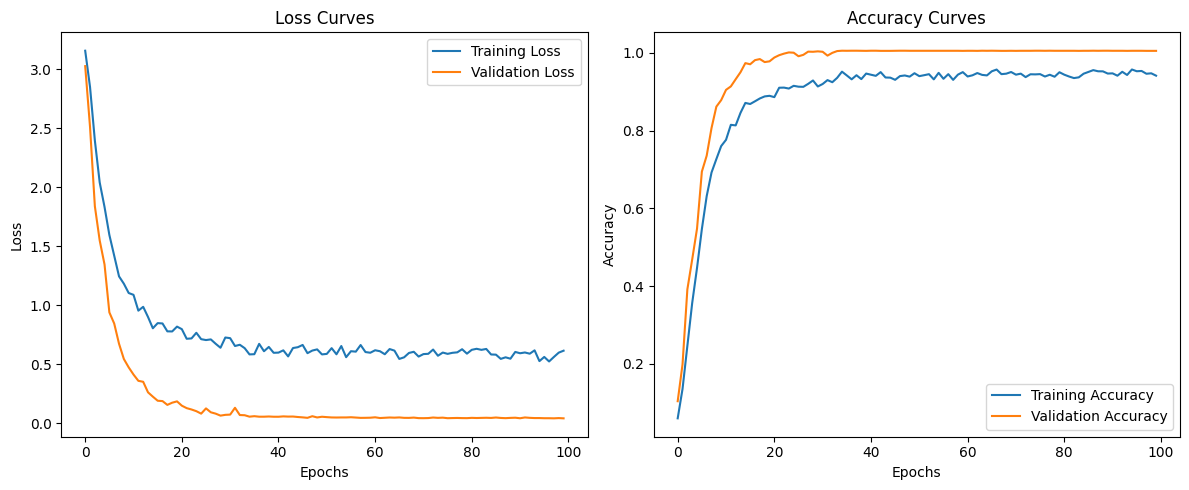

In [ ]:
# Plotting the loss and accuracy curves

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model_path = "/content/drive/MyDrive/Dissertation_data/mnist_model_advanced.keras"
model.save(model_path)

In [ ]:
# Evaluating the model

model =load_model("/content/drive/MyDrive/Dissertation_data/mnist_model_advanced.keras")
loss_mnist, accuracy_mnist = model.evaluate(X_test, y_test)
print("MNIST Test Loss:", loss_mnist)
print("MNIST Test Accuracy:", accuracy_mnist)

225/225 [==============================] - 10s 7ms/step - loss: 0.0994 - accuracy: 0.9932
MNIST Test Loss: 0.0993557721376419
MNIST Test Accuracy: 0.9931678771972656


In [ ]:
# Predicting class probabilities for the test set

y_pred_probs = model.predict(X_test)

# Converting predicted probabilities to class labels

y_pred_labels = np.argmax(y_pred_probs, axis=1)

# True labels

y_true = y_test
y_true_multiclass = np.argmax(y_true, axis=1)


# Computing Precision, Recall, and F1-score

precision = precision_score(y_true_multiclass, y_pred_labels, average='weighted')
recall = recall_score(y_true_multiclass, y_pred_labels, average='weighted')
f1 = f1_score(y_true_multiclass, y_pred_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


225/225 [==============================] - 1s 4ms/step
Precision: 0.9934
Recall: 0.9932
F1-Score: 0.9932


# Loading Asl data all at once


In [ ]:
# Loading and preprocessing ASL images using multiprocessing because all the data is loaded in memory

classes = list('abcdefghijklmnopqrstuvwxyz')

def process_image(data):
    index, row = data
    image = cv2.imread(row['filepath'], cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image at {row['filepath']}")
        return None

    image = cv2.resize(image, (28, 28))
    image = image.astype('float32') / 255.0
    label = classes.index(row['label'])
    return (image, label)

    image = cv2.resize(image, (28, 28))
    image = image.astype('float32') / 255.0
    label = classes.index(row['label'])
    return image, label

# Processing the images using 4 processes

pool = Pool(processes=4)
results = pool.map(process_image, df.iterrows())
pool.close()
pool.join()
images, labels = zip(*results)
images = np.array(images).reshape(-1, 28, 28, 1)
labels = np.array(labels)

input_shape = (28, 28, 1)
num_classes = 26

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Splitting the data into training and validation sets with 70:30

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=42)

# 26 classes for the ASL dataset

y_train = to_categorical(y_train, num_classes=26)
y_val = to_categorical(y_val, num_classes=26)

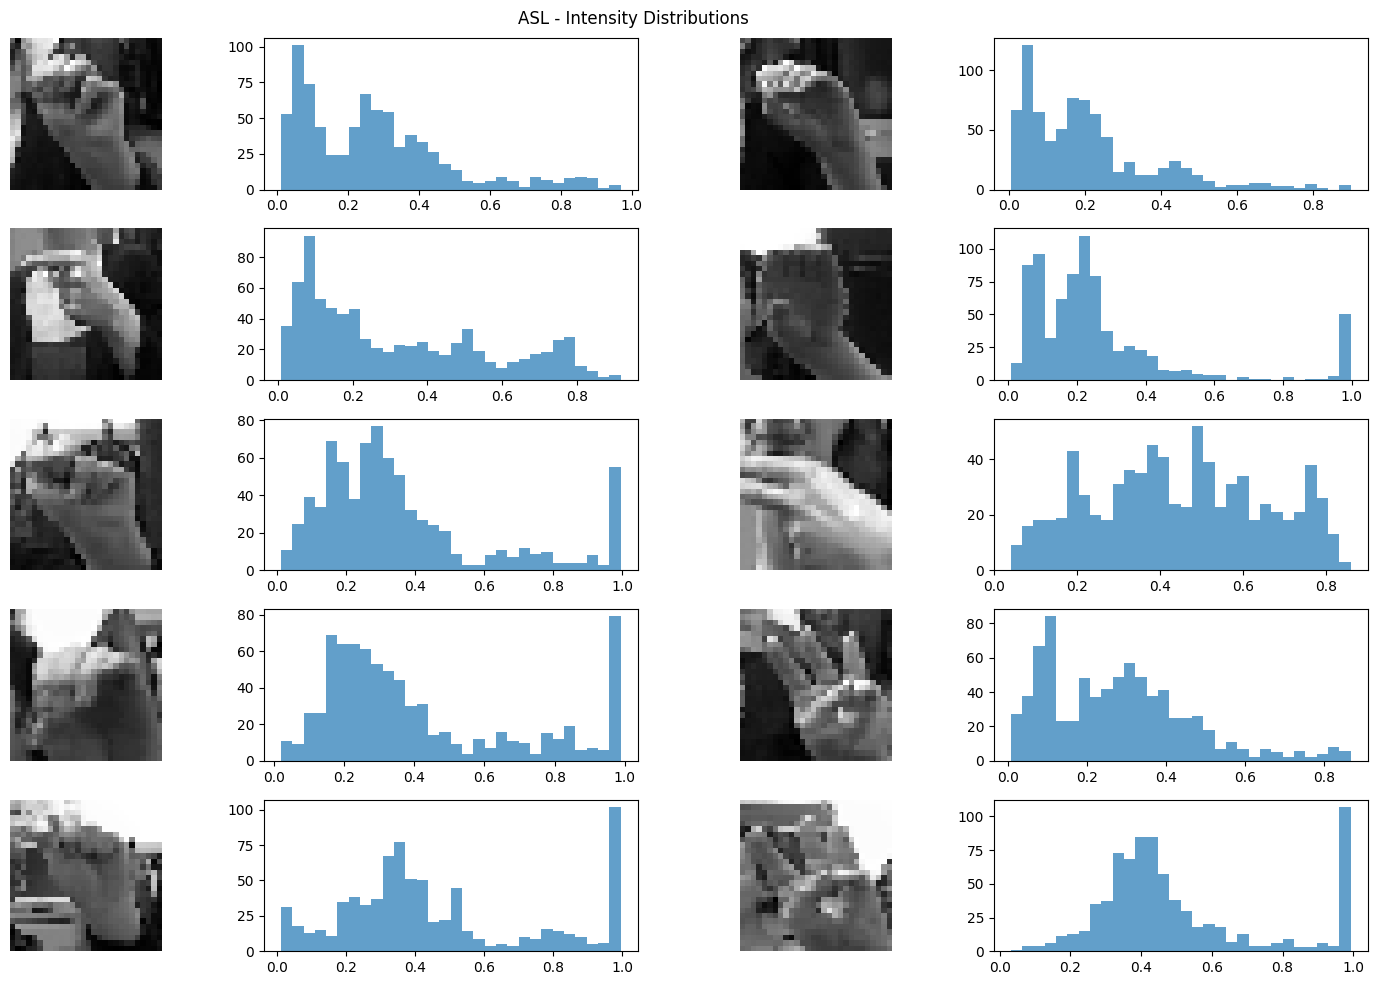

In [ ]:
# Plotting images and their pixel intensity distributions

def plot_intensity_and_image(X_data):
    plt.figure(figsize=(15, 10))

    # Randomly selecting 10 images

    if len(X_data) > 10:
        indices = np.random.choice(len(X_data), 10, replace=False)
        X_sample = X_data[indices]
    else:
        X_sample = X_data

    for i in range(10):

      # Removing the color channel if it's (28, 28, 1)

        img_gray = X_sample[i].squeeze()

        plt.subplot(5, 4, 2*i+1)
        plt.imshow(img_gray, cmap='gray', interpolation='nearest')
        plt.axis('off')
        plt.subplot(5, 4, 2*i+2)
        plt.hist(img_gray.ravel(), bins=30, alpha=0.7)

    plt.suptitle("ASL - Intensity Distributions")
    plt.tight_layout()
    plt.show()

plot_intensity_and_image(X_train)


In [ ]:
model =load_model("/content/drive/MyDrive/Dissertation_data/mnist_model_advanced.keras")


In [ ]:
# ref: https://keras.io/examples/vision/mixup/#:~:text=To%20perform%20the%20mixup%20routine,same%20equation%20is%20applied%20to

# Training parameters
batch_size = 32
epochs = 100
best_val_loss = np.inf
patience = 5
no_improvement_epochs = 0

# for learning rate reduction
factor = 0.2
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Mixup function
def mixup_data(x, y, alpha=0.2):
    # Computing the mixup ratio
    lam = np.random.beta(alpha, alpha)

    # Randomly choosing another set of samples
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)

    # Mixing the data and labels
    mixed_x = lam * x + (1 - lam) * x[index]
    mixed_y = lam * y + (1 - lam) * y[index]

    return mixed_x, mixed_y


In [ ]:
#  Model training

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    train_loss = 0.
    val_loss = 0.
    train_accuracy = 0.
    val_accuracy = 0.

    # Training with mixup of images and labels

    for i in range(0, len(X_train), batch_size):
        x_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
        mixed_x, mixed_y = mixup_data(x_batch, y_batch, alpha)

        loss, acc = model.train_on_batch(mixed_x, mixed_y)
        train_loss += loss
        train_accuracy += acc

    for i in range(0, len(X_val), batch_size):
        x_batch, y_batch = X_val[i:i+batch_size], y_val[i:i+batch_size]
        loss, acc = model.test_on_batch(x_batch, y_batch)
        val_loss += loss
        val_accuracy += acc

    # Computing average losses and accuracies

    train_loss /= len(X_train) // batch_size
    val_loss /= len(X_val) // batch_size
    train_accuracy /= len(X_train) // batch_size
    val_accuracy /= len(X_val) // batch_size

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"train_loss: {train_loss:.4f} - train_accuracy: {train_accuracy:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_accuracy:.4f}")

        # Early stopping and learning rate reduction logic

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement_epochs = 0
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs == patience:

            # Reducing learning rate

            current_lr = tf.keras.backend.get_value(model.optimizer.lr)
            reduced_lr = current_lr * factor
            if reduced_lr < 0.0001:
                reduced_lr = 0.0001
            tf.keras.backend.set_value(model.optimizer.lr, reduced_lr)
            print(f"Learning rate reduced to {reduced_lr}")

            # Resetting the no_improvement counter after reducing the learning rate

            no_improvement_epochs = 0

        # If no improvement even after learning rate reduction then the code will break

        elif no_improvement_epochs >= 2 * patience:
            print(f"\nEarlyStopping at epoch {epoch + 1} with best val_loss: {best_val_loss:.4f}")
            break

asl_model_path = "/content/drive/MyDrive/Dissertation_data/new_asl_trained_model_advanced.h5"
model.save(asl_model_path)


Epoch 1/100
train_loss: 2.8484 - train_accuracy: 0.1827 - val_loss: 2.3699 - val_accuracy: 0.2754

Epoch 2/100
train_loss: 2.4108 - train_accuracy: 0.2965 - val_loss: 2.0872 - val_accuracy: 0.3551

Epoch 3/100
train_loss: 2.2431 - train_accuracy: 0.3553 - val_loss: 1.9065 - val_accuracy: 0.4143

Epoch 4/100
train_loss: 2.1156 - train_accuracy: 0.3963 - val_loss: 1.7715 - val_accuracy: 0.4576

Epoch 5/100
train_loss: 2.0109 - train_accuracy: 0.4343 - val_loss: 1.6621 - val_accuracy: 0.4951

Epoch 6/100
train_loss: 1.9263 - train_accuracy: 0.4657 - val_loss: 1.5669 - val_accuracy: 0.5273

Epoch 7/100
train_loss: 1.8541 - train_accuracy: 0.4898 - val_loss: 1.4876 - val_accuracy: 0.5479

Epoch 8/100
train_loss: 1.7758 - train_accuracy: 0.5179 - val_loss: 1.4137 - val_accuracy: 0.5734

Epoch 9/100
train_loss: 1.7255 - train_accuracy: 0.5381 - val_loss: 1.3503 - val_accuracy: 0.5898

Epoch 10/100
train_loss: 1.6914 - train_accuracy: 0.5530 - val_loss: 1.2950 - val_accuracy: 0.6086

Epoch 11

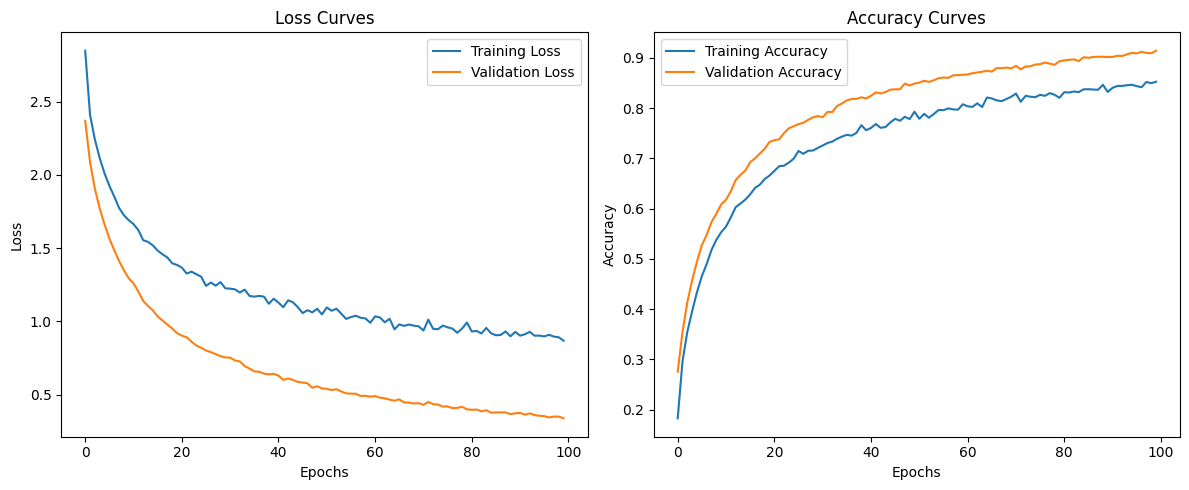

In [ ]:
# Plotting the loss and accuracy curves

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluating the model on the ASL test data

model =load_model("/content/drive/MyDrive/Dissertation_data/new_asl_trained_model_advanced.h5")
loss, accuracy = model.evaluate(X_val, y_val)
print(f"ASL Test Loss: {loss:.4f}")
print(f"ASL Test Accuracy: {accuracy}")

# Predicting class probabilities for the test set

y_pred_probs = model.predict(X_val)

# Converting predicted probabilities to class labels

y_pred_labels = np.argmax(y_pred_probs, axis=1)

# True

y_true = y_val
y_true_multiclass = np.argmax(y_true, axis=1)

# Computing Precision, Recall, and F1-score

precision = precision_score(y_true_multiclass, y_pred_labels, average='weighted')
recall = recall_score(y_true_multiclass, y_pred_labels, average='weighted')
f1 = f1_score(y_true_multiclass, y_pred_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


627/627 [==============================] - 41s 66ms/step - loss: 0.8508 - accuracy: 0.7234
ASL Test Loss: 0.8508
ASL Test Accuracy: 0.7234339714050293
627/627 [==============================] - 34s 54ms/step
Precision: 0.7494
Recall: 0.7234
F1-Score: 0.7231


In [ ]:
# Evaluating the same model on the depth images to see if the model performs well enough

# Loading and preprocessing the depth images in the same manner using multiprocessing

pool = Pool(processes=4)
depth_results = pool.map(process_image, df1.iterrows())
X_depth, y_depth = zip(*depth_results)
X_depth = np.array(X_depth).reshape(-1, 28, 28, 1)
y_depth = to_categorical(np.array(y_depth), num_classes=26)
pool.close()
pool.join()


# The model performs really poor on the depth data

loss_depth, accuracy_depth = model.evaluate(X_depth, y_depth)
print(f"Depth Test Loss: {loss_depth:.4f}")
print(f"Depth Test Accuracy: {accuracy_depth:.4f}")

# Predicting class probabilities for the test set

y_pred_probs = model.predict(X_depth)

# Converting predicted probabilities to class labels

y_pred_labels = np.argmax(y_pred_probs, axis=1)

# True labels

y_true = y_depth
y_true_multiclass = np.argmax(y_true, axis=1)


# Computing Precision, Recall, and F1-score

precision = precision_score(y_true_multiclass, y_pred_labels, average='weighted')
recall = recall_score(y_true_multiclass, y_pred_labels, average='weighted')
f1 = f1_score(y_true_multiclass, y_pred_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


1/1 [==============================] - 1s 539ms/step


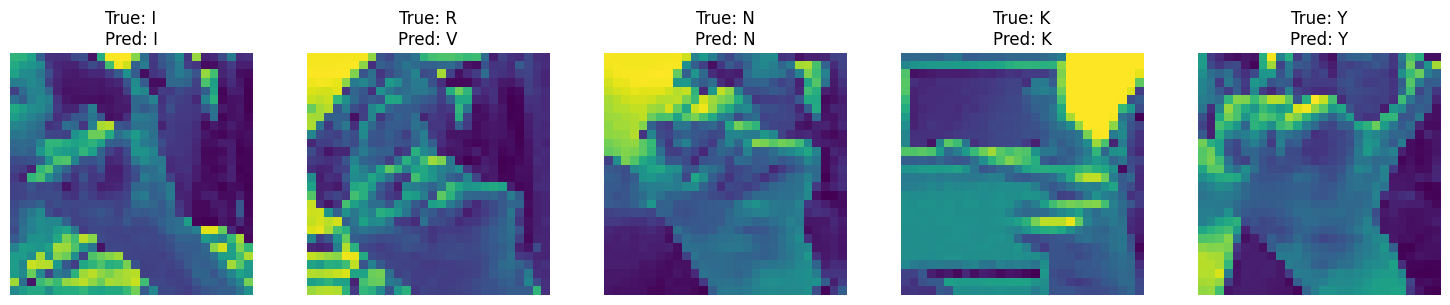

In [ ]:
loaded_model =load_model("/content/drive/MyDrive/Dissertation_data/new_asl_trained_model_advanced.h5")

# Predicting labels for the first 5 test images from the ASL dataset

y_pred_asl = loaded_model.predict(X_val[:5])
y_pred_asl_labels = np.argmax(y_pred_asl, axis=1)
y_true_asl_labels = np.argmax(y_val[:5], axis=1)

# Convert numeric labels to characters

y_pred_asl_chars = [chr(label + 65) for label in y_pred_asl_labels]
y_true_asl_chars = [chr(label + 65) for label in y_true_asl_labels]

# Displaying the image with its true and predicted label

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_val[i].reshape(28, 28))
    ax.set_title(f"True: {y_true_asl_chars[i]}\nPred: {y_pred_asl_chars[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# testing

In [ ]:
!pip install opencv-python-headless


In [ ]:
# ref: This code was taken from https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/colab/examples/Colab_Image_Handling.ipynb

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resizing the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Waiting for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


<IPython.core.display.Javascript object>

Saved to photo.jpg


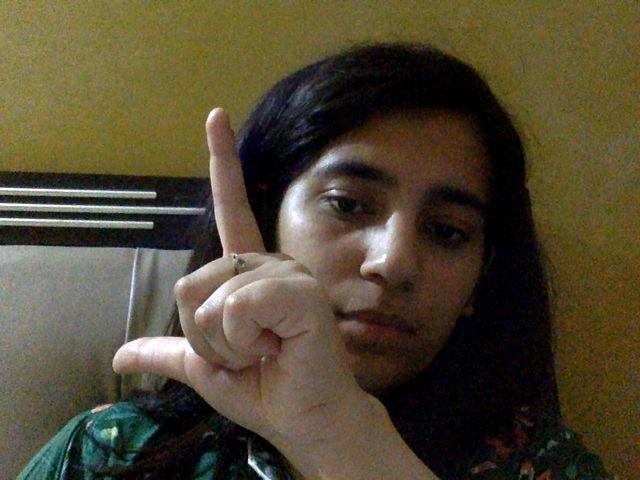

In [ ]:
from IPython.display import Image

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Displaying the image which was just taken.

    display(Image(filename))
except Exception as err:
    print(str(err))


In [ ]:
print(type('/content/photo.jpg'))


<class 'str'>


In [ ]:
captured_image_np = cv2.imread('/content/photo.jpg')


In [ ]:
pip install gTTS


In [ ]:
model = load_model("/content/drive/MyDrive/Dissertation_data/new_asl_trained_model_advanced.h5")

# Evaluating the model's performance on the captured image

gray_image = cv2.cvtColor(captured_image_np, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))
resized_image = resized_image.astype('float32') / 255.0

model_input = np.expand_dims(resized_image, axis=0)
model_input = np.expand_dims(model_input, axis=-1)
predictions = model.predict(model_input)
predicted_label = np.argmax(predictions, axis=1)
print(predicted_label)


1/1 [==============================] - 0s 186ms/step
[7]


1/1 [==============================] - 0s 30ms/step


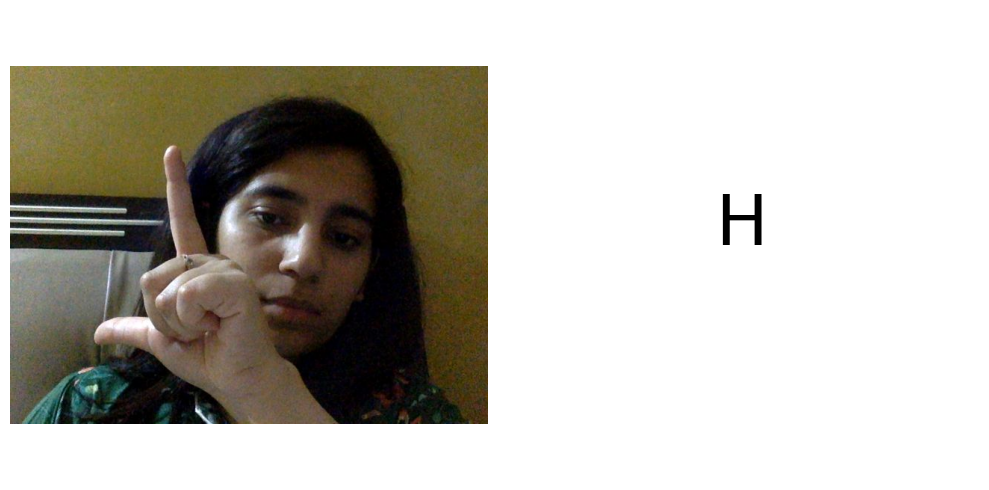

In [ ]:
def label_to_alphabet(label):
    return chr(label + 65)

predictions = model.predict(model_input)
predicted_label_num = np.argmax(predictions, axis=1)
predicted_label_alpha = label_to_alphabet(predicted_label_num[0])

original_img = Image.open('/content/photo.jpg')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, predicted_label_alpha, fontsize=50, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()

# Converting text to audio

tts = gTTS(text=predicted_label_alpha, lang='en')
tts.save("output.mp3")

# Playing the audio file

Audio("output.mp3", autoplay=True)
